In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


C:\Users\aswprabh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


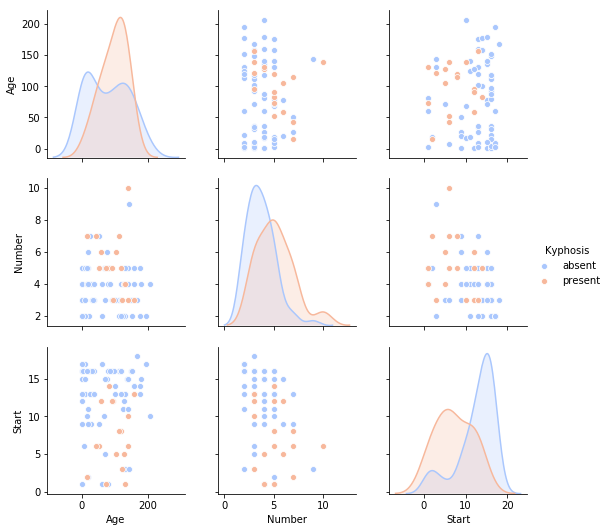

In [21]:
sns.pairplot(data=df,palette='coolwarm',hue='Kyphosis')

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X=df.drop('Kyphosis',axis=1)
Y=df['Kyphosis']

In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [54]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
tree_predictions = dtree.predict(X_test)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(confusion_matrix(Y_test,tree_predictions))
print('\n')
print(classification_report(Y_test,tree_predictions))

[[17  3]
 [ 2  3]]


              precision    recall  f1-score   support

      absent       0.89      0.85      0.87        20
     present       0.50      0.60      0.55         5

   micro avg       0.80      0.80      0.80        25
   macro avg       0.70      0.72      0.71        25
weighted avg       0.82      0.80      0.81        25



### Predicting the same using Logistic to c the score using classification report

In [61]:
df['decision']=pd.get_dummies(df['Kyphosis'],drop_first=True)
df.head()

,Kyphosis,Age,Number,Start,decision
0,absent,71,3,5,0
1,absent,158,3,14,0
2,present,128,4,5,1
3,absent,2,5,1,0
4,absent,1,4,15,0


In [69]:
y=df['decision']

In [70]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [71]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)
log_predict=log.predict(x_test)
print(confusion_matrix(y_test,log_predict))
print('\n')
print(classification_report(y_test,log_predict))

[[15  2]
 [ 5  3]]


              precision    recall  f1-score   support

           0       0.75      0.88      0.81        17
           1       0.60      0.38      0.46         8

   micro avg       0.72      0.72      0.72        25
   macro avg       0.68      0.63      0.64        25
weighted avg       0.70      0.72      0.70        25



C:\Users\aswprabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Now seeing Tree Graph Visualization

In [72]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

ModuleNotFoundError: No module named 'pydot'